In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [12]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x), Variable(y)

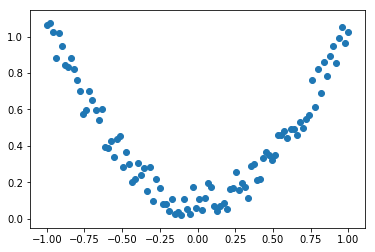

In [13]:
plt.scatter(x.data.numpy(), y.data.numpy())

In [14]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [21]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


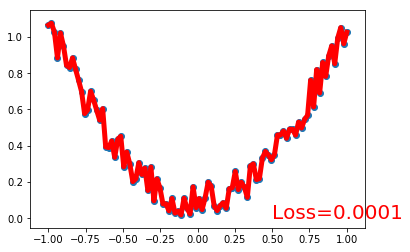

In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

# plt.ion()
num_epochs = 100
for epoch in range(num_epochs):
    prediction = net(x)
    loss = loss_func(prediction, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        # plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y.data.numpy(), "r-", lw=5)
        plt.text(0.5, 0, "Loss={:.4f}".format(loss.data[0]), fontdict={"size": 20, "color": "red"})
        plt.pause(0.5)
# plt.ioff()
# plt.show()